In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import glob
import os
import random

In [ ]:
import cv2 as cv

## check images data
* check from sample images data `BrainDataCT`

In [ ]:
directories = glob.glob("./BrainDataCT/renders/*")
directories = glob.glob("./renders/*")
print(directories)

['./renders/epidural', './renders/multi', './renders/subdural', './renders/subarachnoid', './renders/intraventricular', './renders/intraparenchymal']


In [ ]:
nrows = len(directories)m
ncols = 4

In [ ]:
count_images = 0
for i, folder_path in enumerate(directories):
    for j, folder in enumerate(glob.glob(folder_path+"/*")):
        all_files = glob.glob(folder+'/*')
        subfolder_path = folder.split('/')[-2:]
        hemorrhage_type, window = subfolder_path
        print(f"folder -> {'/'.join(subfolder_path): >40}, {len(all_files):>7} files")
        count_images += len(all_files)
    print('------------------------------------------------')
print(f'total number of images: {count_images}')

folder ->                    epidural/brain_window,    1694 files
folder ->                 epidural/subdural_window,    1694 files
folder ->               epidural/brain_bone_window,    1694 files
folder ->             epidural/max_contrast_window,    1694 files
------------------------------------------------
folder ->                       multi/brain_window,   32074 files
folder ->                    multi/subdural_window,   32074 files
folder ->                  multi/brain_bone_window,   32074 files
folder ->                multi/max_contrast_window,   32074 files
------------------------------------------------
folder ->                    subdural/brain_window,   32200 files
folder ->                 subdural/subdural_window,   32200 files
folder ->               subdural/brain_bone_window,   32200 files
folder ->             subdural/max_contrast_window,   32200 files
------------------------------------------------
folder ->                subarachnoid/brain_window,   16423 f

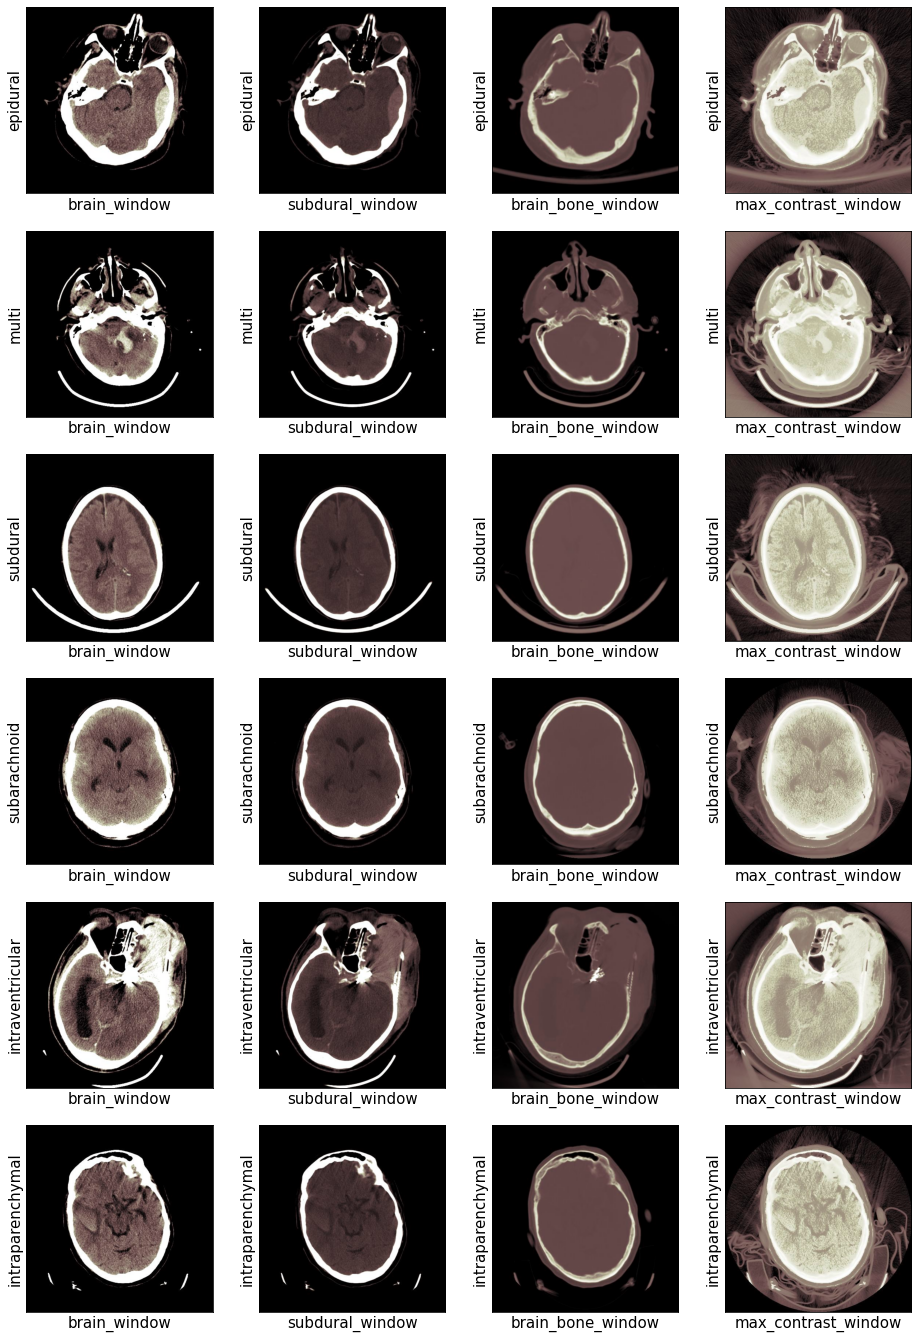

In [ ]:
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4, nrows*4))
for i, folder_path in enumerate(directories):
    for j, folder in enumerate(glob.glob(folder_path+"/*")):
        all_files = glob.glob(folder+'/*')
        subfolder_path = folder.split('/')[-2:]
        hemorrhage_type, window = subfolder_path
#         print(f"folder -> {'/'.join(subfolder_path): >40}, {len(all_files):>7} files")
        if j==0:
            img_path = random.choice(all_files)
        img_name = '/'.join(img_path.split('/')[:-2]) + '/' + window + '/' + img_path.split('/')[-1]
        ax[i,j].imshow(cv.imread(img_name), cmap='gray')
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        if True:
            ax[i,j].set_ylabel(hemorrhage_type, fontsize=15)
        if True:
            ax[i,j].set_xlabel(window, fontsize=15)

In [ ]:
for folder in glob.glob(folder_path+"/*"):
    print(folder)
    break

./BrainDataCT/renders/epidural/brain_window


In [ ]:
img = random.choice(os.listdir(folder))

'ID_0a21c7cde.jpg'

In [ ]:
img = random.choice(glob.glob(folder+'/*'))

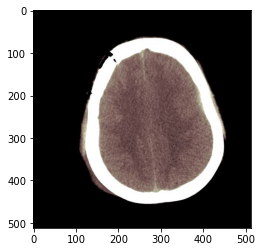

In [ ]:
plt.imshow(cv.imread(img), cmap='gray')

In [ ]:
np.unique(cv.imread(img), return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

## check csv files data

In [ ]:
epidural = pd.read_csv("Hemorrhage_Segmentation_Project/Epidural Hemorrhage Detection.csv")
intraparenchymal = pd.read_csv("Hemorrhage_Segmentation_Project/Intraparenchymal Hemorrhage Detection.csv")
multi = pd.read_csv("Hemorrhage_Segmentation_Project/Multiple Hemorrhage Detection.csv")
subdural = pd.read_csv("Hemorrhage_Segmentation_Project/Subdural Hemorrhage Detection.csv")
subarachnoid = pd.read_csv("Hemorrhage_Segmentation_Project/Subarachnoid Hemorrhage Detection.csv")


hemmorrhage_labels = pd.read_csv("Hemorrhage_Segmentation_Project/hemorrhage-labels.csv")

In [ ]:
epidural.shape, intraparenchymal.shape, multi.shape, subdural.shape, subarachnoid.shape

((610, 14), (1289, 14), (1054, 14), (752, 14), (1031, 14))

In [ ]:
epidural.isna().sum()

Case ID                    0
Origin                     0
URL                        0
Labeling State             0
All Labels                 0
Total Reads                0
Total Qualified Reads      0
Majority Label             0
Number of ROIs             0
Correct Label            300
Difficulty               301
Agreement                  0
Comments                 605
Internal Notes           610
dtype: int64

In [ ]:
epidural.head()

,Case ID,Origin,URL,Labeling State,All Labels,Total Reads,Total Qualified Reads,Majority Label,Number of ROIs,Correct Label,Difficulty,Agreement,Comments,Internal Notes
0,1196514,ID_004c4b319.jpg,https://go.centaurlabs.com/problem/1196514,Labeled,"['[{""x"": 0.40818718, ""y"": 0.8623607}, {""x"": 0....",19.0,5.0,"[{""x"": 0.537109375, ""y"": 0.89453125}, {""x"": 0....",1.0,"[[{'x': 0.537109375, 'y': 0.89453125}, {'x': 0...",0.00,0.968851,NaN,NaN
1,1196682,ID_0237b835f.jpg,https://go.centaurlabs.com/problem/1196682,Ready,"['[{""x"": 0.62959146, ""y"": 0.720186}, {""x"": 0.6...",51.0,28.0,"[{""x"": 0.654296875, ""y"": 0.724609375}, {""x"": 0...",1.0,NaN,NaN,0.063519,NaN,NaN
2,1196477,ID_02e2d273d.jpg,https://go.centaurlabs.com/problem/1196477,Labeled,"['[{""x"": 0.35205495, ""y"": 0.34680602}, {""x"": 0...",22.0,6.0,"[{""x"": 0.46484375, ""y"": 0.357421875}, {""x"": 0....",1.0,"[[{'x': 0.46484375, 'y': 0.357421875}, {'x': 0...",0.06,0.710300,NaN,NaN
3,1196612,ID_02f37ce84.jpg,https://go.centaurlabs.com/problem/1196612,Ready,"['[{""x"": 0.3680166, ""y"": 0.48387372}, {""x"": 0....",51.0,29.0,"[{""x"": 0.431640625, ""y"": 0.607421875}, {""x"": 0...",2.0,NaN,NaN,0.264134,NaN,NaN
4,1196612,ID_02f37ce84.jpg,https://go.centaurlabs.com/problem/1196612,Ready,"['[{""x"": 0.3680166, ""y"": 0.48387372}, {""x"": 0....",51.0,29.0,"[{""x"": 0.353515625, ""y"": 0.59765625}, {""x"": 0....",2.0,NaN,NaN,0.264134,NaN,NaN


In [ ]:
intraparenchymal.head()

,Case ID,Origin,URL,Labeling State,All Labels,Total Reads,Total Qualified Reads,Majority Label,Number of ROIs,Correct Label,Difficulty,Agreement,Comments,Internal Notes
0,1675660,ID_0002081b6.jpg,https://go.centaurlabs.com/problem/1675660,In Progress,"['[{""x"": 0.31658885, ""y"": 0.48357323}, {""x"": 0...",22.0,9.0,"[{""x"": 0.3046875, ""y"": 0.484375}, {""x"": 0.3046...",1.0,NaN,NaN,0.224542,NaN,NaN
1,1675942,ID_0048e60a4.jpg,https://go.centaurlabs.com/problem/1675942,In Progress,"['[{""x"": 0.54811704, ""y"": 0.5961946}, {""x"": 0....",22.0,7.0,"[{""x"": 0.5859375, ""y"": 0.640625}, {""x"": 0.5859...",1.0,NaN,NaN,0.772365,NaN,NaN
2,1197689,ID_0057d2736.jpg,https://go.centaurlabs.com/problem/1197689,Labeled,"['[{""x"": 0.3040109, ""y"": 0.52168596}, {""x"": 0....",46.0,9.0,"[{""x"": 0.3046875, ""y"": 0.521484375}, {""x"": 0.3...",1.0,"[[{'x': 0.3046875, 'y': 0.521484375}, {'x': 0....",0.02,0.738368,NaN,NaN
3,1197754,ID_007cac3b7.jpg,https://go.centaurlabs.com/problem/1197754,Labeled,"['[{""x"": 0.41792268, ""y"": 0.56897116}, {""x"": 0...",51.0,10.0,"[{""x"": 0.41015625, ""y"": 0.615234375}, {""x"": 0....",1.0,"[[{'x': 0.4140625, 'y': 0.6171875}, {'x': 0.41...",0.03,0.618086,NaN,NaN
4,1675775,ID_00b46c6bc.jpg,https://go.centaurlabs.com/problem/1675775,In Progress,"['[{""x"": 0.82215744, ""y"": 0.20116618}, {""x"": 0...",22.0,6.0,"[{""x"": 0.365234375, ""y"": 0.693359375}, {""x"": 0...",1.0,NaN,NaN,0.006388,NaN,NaN


In [ ]:
intraparenchymal.loc[0, "All Labels"]

'[\'[{"x": 0.31658885, "y": 0.48357323}, {"x": 0.3329847, "y": 0.4722452}, {"x": 0.34431273, "y": 0.47313952}, {"x": 0.3580256, "y": 0.4677736}, {"x": 0.36786312, "y": 0.45733988}, {"x": 0.37561387, "y": 0.44660807}, {"x": 0.38902867, "y": 0.43766487}, {"x": 0.4006548, "y": 0.42991412}, {"x": 0.40214533, "y": 0.42186522}, {"x": 0.39230782, "y": 0.41649932}, {"x": 0.38545138, "y": 0.40368077}, {"x": 0.37919116, "y": 0.3971224}, {"x": 0.3729309, "y": 0.38698682}, {"x": 0.36577636, "y": 0.37953416}, {"x": 0.36011234, "y": 0.38013035}, {"x": 0.33179227, "y": 0.37953416}, {"x": 0.32583013, "y": 0.37863985}, {"x": 0.31509832, "y": 0.37565878}, {"x": 0.2995968, "y": 0.3777455}, {"x": 0.291846, "y": 0.3863906}, {"x": 0.29154792, "y": 0.3917565}, {"x": 0.28528768, "y": 0.39861295}, {"x": 0.2718729, "y": 0.41292205}, {"x": 0.26889184, "y": 0.42126903}, {"x": 0.2706805, "y": 0.43289518}, {"x": 0.27395964, "y": 0.4442232}, {"x": 0.28260472, "y": 0.46002284}, {"x": 0.29661572, "y": 0.4776111}]\'\n 

In [ ]:
hemmorrhage_labels.head(20)

,Image,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
0,ID_000012eaf,0,0,0,0,0,0
1,ID_000039fa0,0,0,0,0,0,0
2,ID_00005679d,0,0,0,0,0,0
3,ID_00008ce3c,0,0,0,0,0,0
4,ID_0000950d7,0,0,0,0,0,0
5,ID_0000aee4b,0,0,0,0,0,0
6,ID_0000ca2f6,0,0,0,0,0,0
7,ID_0000f1657,0,0,0,0,0,0
8,ID_000178e76,0,0,0,0,0,0
9,ID_00019828f,0,0,0,0,0,0


In [ ]:
hemmorrhage_labels.shape

(752803, 7)

In [ ]:
epidural_brain_bone_files = glob.glob("renders/epidural/brain_bone_window/*.jpg")

In [ ]:
len(epidural_brain_bone_files)

1694

In [ ]:
epidural_brain_window_files = glob.glob("renders/epidural/brain_window/*.jpg")

In [ ]:
len(epidural_brain_window_files)

1694

In [ ]:
intraparenchymal_brain_bone_files = glob.glob("renders/intraparenchymal/brain_bone_window/*.jpg")

In [ ]:
len(intraparenchymal_brain_bone_files)

15664

In [ ]:
epidural_brain_bone_files[7].split('.')[0].split('/')[-1] in hemmorrhage_labels['Image'].values

True

In [ ]:
'ID_00008ce3c' in hemmorrhage_labels['Image'].values

True